# INTELIGÊNCIA ARTIFICIAL
## **DEEP LEARNING**
* https://www.tutorialspoint.com/keras/keras_convolution_neural_network.htm#
* https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e

#### **Base de Dados:**
* Uma imagem preta e branca (grayscale) é representada como uma matrix 2D;
* Em cada posição da matrix representa um pixel da imagem;
* Os valores para cada elemento variam entre 0 (preto) até 255 (branco)

<center>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*8Ja5x9y-7-Mecxth7_zQOw.jpeg">
<figcaption>Representação grayscale. Fonte: Stanfor</figcaption>



### **Camadas de Convoluções**

* Matematicamente, uma convolução é uma operação linear que a partir de duas funções, gera uma terceira (normalmente chamada de **feature map**);
* Podemos entender esse processo como um filtro/kernel que transforma uma imagem de entrada;
* Um kernel é uma matrix utilizada para uma operação de multiplicação de matrizes;
* Esta operação é aplicada diversas vezes em diferentes regiões da imagem.

<center>
<img src="https://www.researchgate.net/profile/Martin-Andreoni/publication/355261609/figure/fig6/AS:1081493766053894@1634859615362/Figura-46-Estrutura-simplificada-de-uma-rede-neural-convolucional-Convolutional-Neural.ppm" width="700"
     height="200">
<figcaption>Estrutura simplificada de uma rede neural convolucional</figcaption>



### **Pooling**

* É um processo simples de redução da dimensionalidade/features maps;
* Busca diminuir a variância a pequenas alterações e também de reduzir a quantidade de parâmetros treinados pela rede;
* Existem 3 operações diferentes de Pooling (MaxPooling, SumPooling, AvaragePooling).

#### **Dropout**

* A camada de Dropout é utilizada para evitar que determinadas partes da rede neural tenham muita responsabilidade e consequentemente, possam ficar muito sensíveis a pequenas alterações;
* Essa camada recebe um hyper-parâmetro que define uma probabilidade de **desligar** determinada área da rede neural durante o processo de treinamento.

#### **Flatten**

* É utilizada na divisão das 2 partes da CNN (extração de características / rede neural tradicional );
* Ela basicamente opera uma transformação na matrix da imagem, alterando seu formato para um array.
* Exemplo, uma imagem em grayscale de 28x28 será transformada para um array de 784 posições.

## **Exemplo base dados mnist**
* Reconhecimento de dígitos escritos a mão;
* Formato grayscale representados por uma matrix 28x28

<center>
<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png" width="500"
     height="300">
<figcaption>Base de Dados MNIST</figcaption>

##### **Topologia**

<center>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*qgVD10M-KchTd-rfjGK2aQ.jpeg" width="600"
     height="300">
<figcaption>Topologia CNN utilizada</figcaption>


* Inicialmente é aplicado um processo de convolução com 32 filtros na imagem de entrada;
* Aplica-se outro processo de convolução com 64 filtros;
* Na próxima camada, aplica-se MaxPooling (reduzirá o tamanho para 14x14);
* A nova dimensão é ajustada  em um array pela operação Flatten (64x14x14 = 12544)

In [ ]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

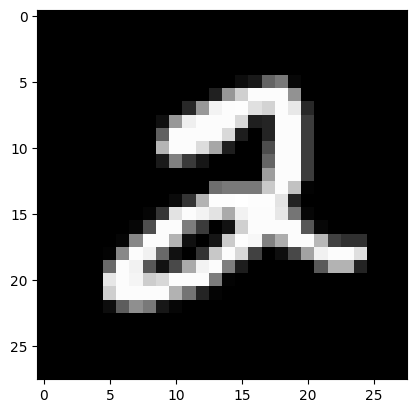

In [ ]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[5], cmap = 'gray')

In [ ]:
X_treinamento.shape

(60000, 28, 28)

In [ ]:
X_teste.shape

(10000, 28, 28)

In [ ]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [ ]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [ ]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, (5,5), activation='relu', input_shape=(28, 28,1)))
modelo.add(Conv2D(64, (5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))

modelo.add(Dense(10, activation='softmax'))

In [ ]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 5,
                       validation_data = (X_teste, y_teste))

Epoch 1/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0998 - accuracy: 0.9696 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 2/5
1875/1875 [==============================] - 158s 85ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0362 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0312 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0347 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 145s 78ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0345 - val_accuracy: 0.9903


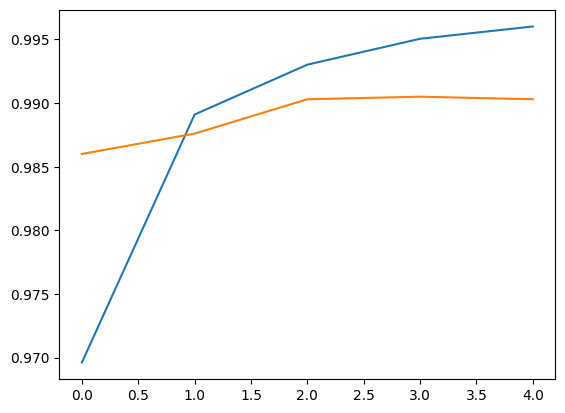

In [ ]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['accuracy'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

##### Acurácia final do modelo

In [ ]:
test_loss, test_acc = modelo.evaluate(X_teste,  y_teste, verbose=2)

313/313 - 10s - loss: 0.0345 - accuracy: 0.9903 - 10s/epoch - 33ms/step


In [ ]:
print(f'Acurácia: {test_acc} - Erro: {test_loss}')

0.9902999997138977
